### Parsing dates

#### reference: https://strftime.org/

In [1]:
import pandas as pd

In [3]:
date_data_one = ['Saturday January 27, 2017', 'Saturday December 2, 2017']
# Provide the correct format for the date
date_data_one = pd.to_datetime(date_data_one, format="%A %B %d, %Y")
print(date_data_one)

DatetimeIndex(['2017-01-27', '2017-12-02'], dtype='datetime64[ns]', freq=None)


In [4]:
date_data_two = ['2017-01-01', '2016-05-03']
# Provide the correct format for the date
date_data_two = pd.to_datetime(date_data_two, format="%Y-%m-%d")
print(date_data_two)

DatetimeIndex(['2017-01-01', '2016-05-03'], dtype='datetime64[ns]', freq=None)


In [5]:
date_data_three = ['08/17/1978', '01/07/1976']
# Provide the correct format for the date
date_data_three = pd.to_datetime(date_data_three, format="%m/%d/%Y")
print(date_data_three)

DatetimeIndex(['1978-08-17', '1976-01-07'], dtype='datetime64[ns]', freq=None)


In [7]:
date_data_four = ['2016 March 01 01:56', '2016 January 4 02:16']
# Provide the correct format for the date
date_data_four = pd.to_datetime(date_data_four, format="%Y %B %d %H:%M")
print(date_data_four)

DatetimeIndex(['2016-03-01 01:56:00', '2016-01-04 02:16:00'], dtype='datetime64[ns]', freq=None)


### Plotting time series data


In [36]:
# Import pandas 
import pandas as pd
from datetime import timedelta
# Load the customer_data
customer_data = pd.read_csv('/Users/xingkaiwu/Library/CloudStorage/OneDrive-YorkUniversity/MBAN Winter/MBAN 6400/Customer Analytics and AB Testing in Python/user_demographics_v1.csv')
customer_data['reg_date'] = pd.to_datetime(customer_data['reg_date']).dt.date
# Load the app_purchases
app_purchases = pd.read_csv('/Users/xingkaiwu/Library/CloudStorage/OneDrive-YorkUniversity/MBAN Winter/MBAN 6400/Customer Analytics and AB Testing in Python/purchase_data_v1.csv')
app_purchases['date'] = pd.to_datetime(app_purchases['date']).dt.date

# Merge on the 'uid' field
user_purchases = app_purchases.merge(customer_data, on=['uid'], how='inner')

current_date = pd.to_datetime('2018-03-17')  
# Limit to users who have had a week to subscribe 
 
max_lapse_date = current_date - timedelta(days=7)
user_purchases['first_week_purchases'] = user_purchases.date < max_lapse_date
user_purchases['first_week_purchases']=user_purchases['first_week_purchases'].astype('int')

/Users/xingkaiwu/miniforge3/envs/tf/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


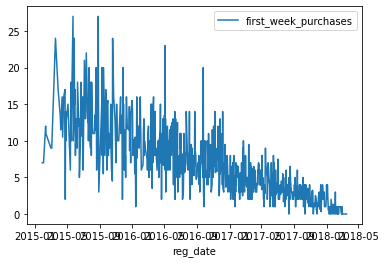

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
# Group the data and aggregate first_week_purchases
user_purchases = user_purchases.groupby(by=['reg_date', 'uid']).agg({'first_week_purchases': ['sum']})

# Reset the indexes
user_purchases.columns = user_purchases.columns.droplevel(level=1)
user_purchases.reset_index(inplace=True)

# Find the average number of purchases per day by first-week users
user_purchases = user_purchases.groupby(by=['reg_date']).agg({'first_week_purchases': ['mean']})
user_purchases.columns = user_purchases.columns.droplevel(level=1)
user_purchases.reset_index(inplace=True)

# Plot the results
user_purchases.plot(x='reg_date', y='first_week_purchases')
plt.show()

In [47]:
# Load the customer_data
customer_data = pd.read_csv('/Users/xingkaiwu/Library/CloudStorage/OneDrive-YorkUniversity/MBAN Winter/MBAN 6400/Customer Analytics and AB Testing in Python/user_demographics_v1.csv')
customer_data['reg_date'] = pd.to_datetime(customer_data['reg_date']).dt.date
# Load the app_purchases
app_purchases = pd.read_csv('/Users/xingkaiwu/Library/CloudStorage/OneDrive-YorkUniversity/MBAN Winter/MBAN 6400/Customer Analytics and AB Testing in Python/purchase_data_v1.csv')
app_purchases['date'] = pd.to_datetime(app_purchases['date']).dt.date

# Merge on the 'uid' field
user_purchases = app_purchases.merge(customer_data, on=['uid'], how='inner')

current_date = pd.to_datetime('2018-03-17')  
# Limit to users who have had a week to subscribe 
 
max_lapse_date = current_date - timedelta(days=7)
user_purchases['first_week_purchases'] = user_purchases.date < max_lapse_date
user_purchases['first_week_purchases']=user_purchases['first_week_purchases'].astype('int')

# Group the data and aggregate first_week_purchases
user_purchases = user_purchases.groupby(by=['country','reg_date', 'uid']).agg({'first_week_purchases': ['sum']})

# Reset the indexes
user_purchases.columns = user_purchases.columns.droplevel(level=1)
user_purchases.reset_index(inplace=True)

# Find the average number of purchases per day by first-week users
user_purchases = user_purchases.groupby(by=['reg_date','country']).agg({'first_week_purchases': ['mean']})
user_purchases.columns = user_purchases.columns.droplevel(level=1)
user_purchases.reset_index(inplace=True)


/Users/xingkaiwu/miniforge3/envs/tf/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [52]:
# Pivot the data
country_pivot = pd.pivot_table(user_purchases, values=['first_week_purchases'], columns=['country'], index=['reg_date'])
print(country_pivot.head())

           first_week_purchases                      
country                     BRA CAN DEU FRA TUR   USA
reg_date                                             
2015-01-27                  NaN NaN NaN NaN NaN   7.0
2015-02-01                  7.0 NaN NaN NaN NaN   NaN
2015-02-09                  NaN NaN NaN NaN NaN  12.0
2015-02-10                  NaN NaN NaN NaN NaN  11.0
2015-03-01                  NaN NaN NaN NaN NaN   9.0


### Examining the different cohorts


In [57]:
country_pivot = pd.DataFrame(country_pivot.to_records())
country_pivot.columns = [hdr.replace("('first_week_purchases', '", "").replace("')", "") \
                     for hdr in country_pivot.columns]

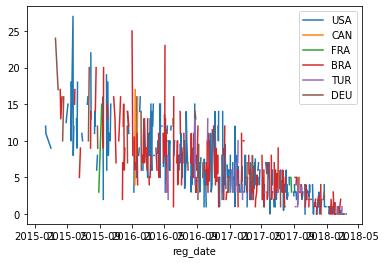

In [59]:
# Plot the average first week purchases for each country by registration date
country_pivot.plot(x='reg_date', y=['USA', 'CAN', 'FRA', 'BRA', 'TUR', 'DEU'])
plt.show()

In [44]:
# Load the customer_data
customer_data = pd.read_csv('/Users/xingkaiwu/Library/CloudStorage/OneDrive-YorkUniversity/MBAN Winter/MBAN 6400/Customer Analytics and AB Testing in Python/user_demographics_v1.csv')
customer_data['reg_date'] = pd.to_datetime(customer_data['reg_date']).dt.date
# Load the app_purchases
app_purchases = pd.read_csv('/Users/xingkaiwu/Library/CloudStorage/OneDrive-YorkUniversity/MBAN Winter/MBAN 6400/Customer Analytics and AB Testing in Python/purchase_data_v1.csv')
app_purchases['date'] = pd.to_datetime(app_purchases['date']).dt.date

# Merge on the 'uid' field
user_purchases = app_purchases.merge(customer_data, on=['uid'], how='inner')

current_date = pd.to_datetime('2018-03-17')  
# Limit to users who have had a week to subscribe 
 
max_lapse_date = current_date - timedelta(days=7)
user_purchases['first_week_purchases'] = user_purchases.date < max_lapse_date
user_purchases['first_week_purchases']=user_purchases['first_week_purchases'].astype('int')

# Group the data and aggregate first_week_purchases
user_purchases = user_purchases.groupby(by=['device','reg_date', 'uid']).agg({'first_week_purchases': ['sum']})

# Reset the indexes
user_purchases.columns = user_purchases.columns.droplevel(level=1)
user_purchases.reset_index(inplace=True)

# Find the average number of purchases per day by first-week users
user_purchases = user_purchases.groupby(by=['reg_date','device']).agg({'first_week_purchases': ['mean']})
user_purchases.columns = user_purchases.columns.droplevel(level=1)
user_purchases.reset_index(inplace=True)


/Users/xingkaiwu/miniforge3/envs/tf/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [46]:
# Pivot the data
device_pivot = pd.pivot_table(user_purchases, values=['first_week_purchases'], columns=['device'], index=['reg_date'])
print(device_pivot.head())

           first_week_purchases      
device                      and   iOS
reg_date                             
2015-01-27                  NaN   7.0
2015-02-01                  7.0   NaN
2015-02-09                 12.0   NaN
2015-02-10                  NaN  11.0
2015-03-01                  NaN   9.0


In [60]:
device_pivot

first_week_purchases      
device                      and   iOS
reg_date                             
2015-01-27                  NaN   7.0
2015-02-01                  7.0   NaN
2015-02-09                 12.0   NaN
2015-02-10                  NaN  11.0
2015-03-01                  NaN   9.0
...                         ...   ...
2018-03-11                  0.0   NaN
2018-03-13                  0.0   NaN
2018-03-15                  0.0   0.0
2018-03-16                  0.0   0.0
2018-03-17                  0.0   0.0

[739 rows x 2 columns]

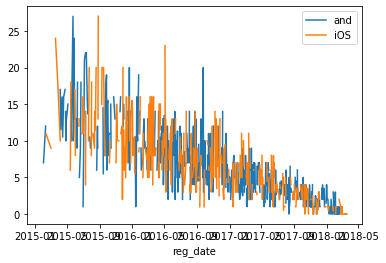

In [62]:
device_pivot = pd.DataFrame(device_pivot.to_records())
device_pivot.columns = [hdr.replace("('first_week_purchases', '", "").replace("')", "") \
                     for hdr in device_pivot.columns]

device_pivot.plot(x='reg_date', y=['and', 'iOS'])
plt.show()

### Seasonality and moving averages


In [5]:
import pandas as pd
data =pd.read_csv('/Users/xingkaiwu/Library/CloudStorage/OneDrive-YorkUniversity/MBAN Winter/MBAN 6400/Customer Analytics and AB Testing in Python/daily_revenue.csv')
daily_revenue = data[['date','revenue']]

In [8]:
daily_revenue = data[['date','revenue']][0:1200]

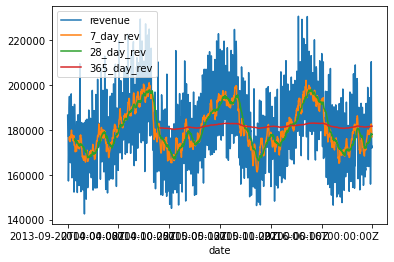

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
# Compute 7_day_rev
daily_revenue['7_day_rev'] = daily_revenue.revenue.rolling(window=7,center=False).mean()

# Compute 28_day_rev
daily_revenue['28_day_rev'] = daily_revenue.revenue.rolling(window=28,center=False).mean()
    
# Compute 365_day_rev
daily_revenue['365_day_rev'] = daily_revenue.revenue.rolling(window=365,center=False).mean()
    
# Plot date, and revenue, along with the 3 rolling functions (in order)    
daily_revenue.plot(x='date', y=['revenue', '7_day_rev', '28_day_rev', '365_day_rev', ])
plt.show()

### Exponential rolling average & over/under smoothing


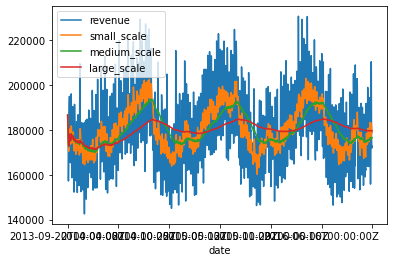

In [12]:
daily_revenue = data[['date','revenue']][0:1200]
# Calculate 'small_scale'
daily_revenue['small_scale'] = daily_revenue.revenue.ewm(span=10).mean()

# Calculate 'medium_scale'
daily_revenue['medium_scale'] = daily_revenue.revenue.ewm(span=100).mean()

# Calculate 'large_scale'
daily_revenue['large_scale'] = daily_revenue.revenue.ewm(span=500).mean()

# Plot 'date' on the x-axis and, our three averages and 'revenue'
# on the y-axis
daily_revenue.plot(x = 'date', y =['revenue', 'small_scale', 'medium_scale', 'large_scale'])
plt.show()

### Visualizing user spending


In [27]:
user_revenue = data[['date','gender','device','revenue']]
user_revenue['month'] = pd.to_datetime(user_revenue['date']).dt.date
user_revenue = user_revenue[['month','gender','device','revenue']][pd.DatetimeIndex(user_revenue['month']).day==1]

/var/folders/9s/zz7k8h2949d__gv0rmbn3yj80000gn/T/ipykernel_16158/4082629676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_revenue['month'] = pd.to_datetime(user_revenue['date']).dt.date


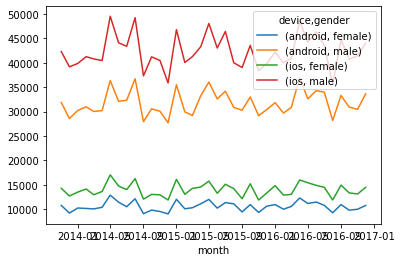

In [29]:
# Pivot user_revenue
pivoted_data = pd.pivot_table(user_revenue, values ='revenue', columns=['device', 'gender'], index='month')
pivoted_data = pivoted_data[1:(len(pivoted_data) -1 )]

# Create and show the plot
pivoted_data.plot()
plt.show()